In [68]:
import numpy as np
import matplotlib.pyplot as plt

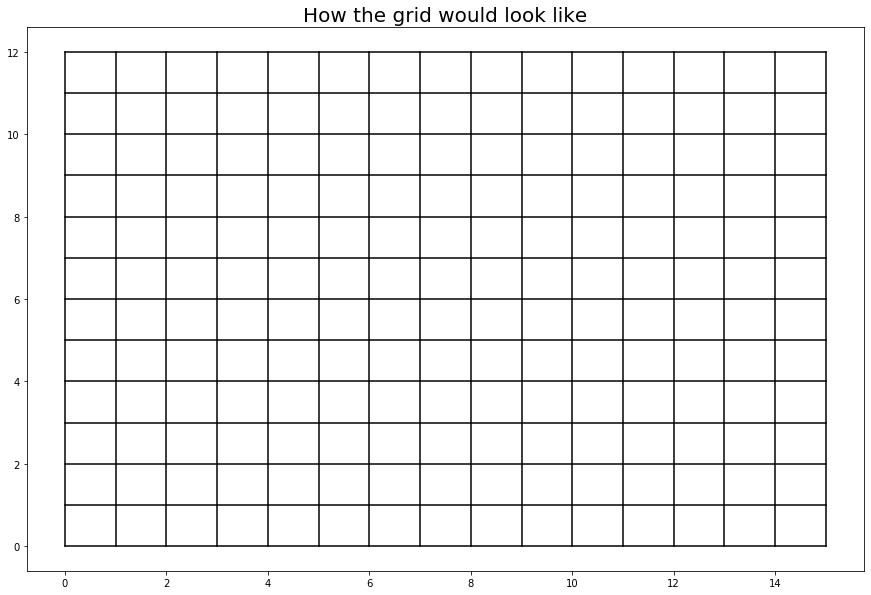

In [135]:
# definition of size of the grid on which the snake is going to live
nb_lines = 12
nb_cols = 15

# plotting to see if this looks good
grid = np.zeros((1, nb_cols + 1)) + np.arange(0, nb_lines + 1).reshape(nb_lines + 1, 1)

plt.figure(figsize = (15, 10))
# plotting the lines of the grid
for line in grid : plt.plot(line, color = 'black')

# plotting the columns
for k, col in enumerate(grid.T) : plt.plot(k * np.ones(nb_lines  + 1),col , color = 'black')

plt.title("How the grid would look like", fontsize = 20)   
plt.show()

In [136]:
# let's create our training data. 
# Our snake will have at every step 4 different actions
# available: going to the top, left, right, down. Let's build a function 
# giving the right action to execute. It is then used to create a training dataset and 
# testing dataset

def action_to_do(pos_x_snake, pos_y_snake, pos_x_food, pos_y_food) : 
    """
    (int) pos_x_snake : x coordinate of the snake
    (int) pos_y_snake : y coordinate of the snake
    (int) pos_x_food : x coordinate of the food (which is the target) 
    (int) pos_y_food : y coordinate of the food (which is the target) 
    """    
    # way_to_go : an array of 4 elements, 3 equal to zero, 1 to one. The one 
    # indicates the direction in which the snake should head to 
    # [top, right, down, left] (clockwise)
    way_to_go = None
    
    # computing the difference between the x-positions (1st input of the neural net)
    diff_x = pos_x_snake - pos_x_food
    
    # computing the difference between the y-positions (2nd input of the neural net)
    diff_y = pos_y_snake - pos_y_food
    
    # set of rules
    if abs(diff_x) > abs(diff_y) : 
        if diff_x > 0 : way_to_go = np.array([0, 0, 0, 1])
        else : way_to_go = np.array([0, 1, 0, 0])
    else : 
        if diff_y > 0 : way_to_go = np.array([0, 0, 1, 0])
        else : way_to_go = np.array([1, 0, 0, 0])
            
    return(way_to_go)


In [137]:
# given a direction array outputs the value to add or substract to x and y
def from_way_to_pos(pos_snake, action) : 
    """
    (array) pos_snake : [[x_snake], [y_snake]] position of snake
    (array) action : direction in which the snake should head to
                     [top, right, down, left], put 1 for the chosen direction,
                     0 for the rest
    """
    trans_array = np.array([[0, 1, 0, -1], [1, 0, -1, 0]])
    
    # gives (positive or negative) value to add to the current position vector
    grad = np.dot(trans_array, action)
    
    _pos_snake = pos_snake + grad
    return(_pos_snake)
    

# testing our test action to make sure the training data we built is true
def test_action_to_do(pos_snake, pos_food, list_actions) : 
    """
    (array) pos_snake : [[x_snake], [y_snake]] position of snake
    (array) pos_food : [[x_food], [y_food]] position of food
    list[array] list_actions : list of ways to choose to get from the snake initial 
                               position to the target (the food)
    
    """
    pos_x_snake, pos_y_snake = pos_snake[0, 0], pos_snake[1, 0]
    pos_x_food, pos_y_food = pos_food[0, 0], pos_food[1, 0]
    
    # check if snake has reached its target
    if pos_x_snake - pos_x_food + pos_y_snake - pos_y_food == 0 : 
        return(list_actions)
    
    else : 
        # getting what is the next move
        action = action_to_do(pos_x_snake, pos_y_snake, pos_x_food, pos_y_food)
        list_actions.append(action)
        
        # reshape for broadcasting
        _action =  action[:, None]
        
        # obtaining the new position
        _pos_snake = from_way_to_pos(pos_snake, _action)
        list_actions = test_action_to_do(_pos_snake, pos_food, list_actions)
        
        return(list_actions)
    

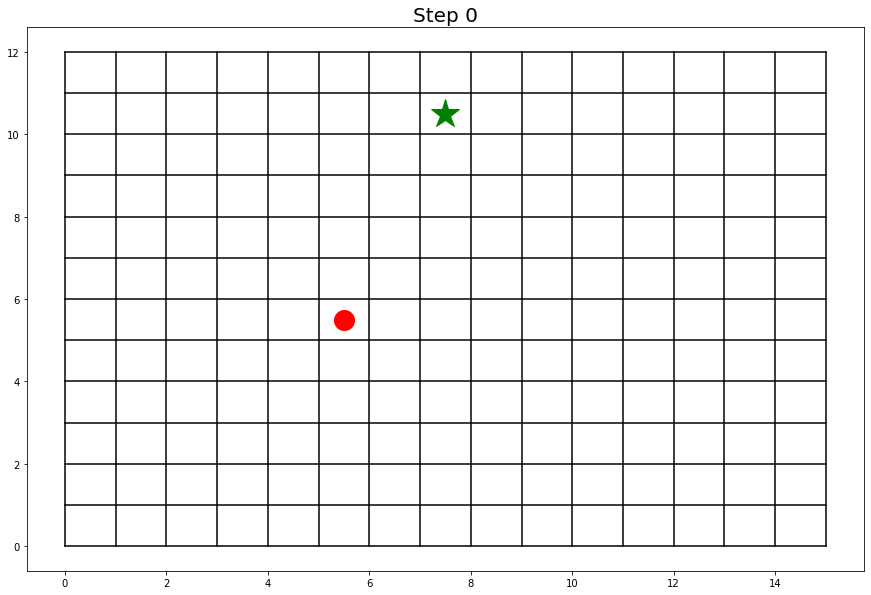

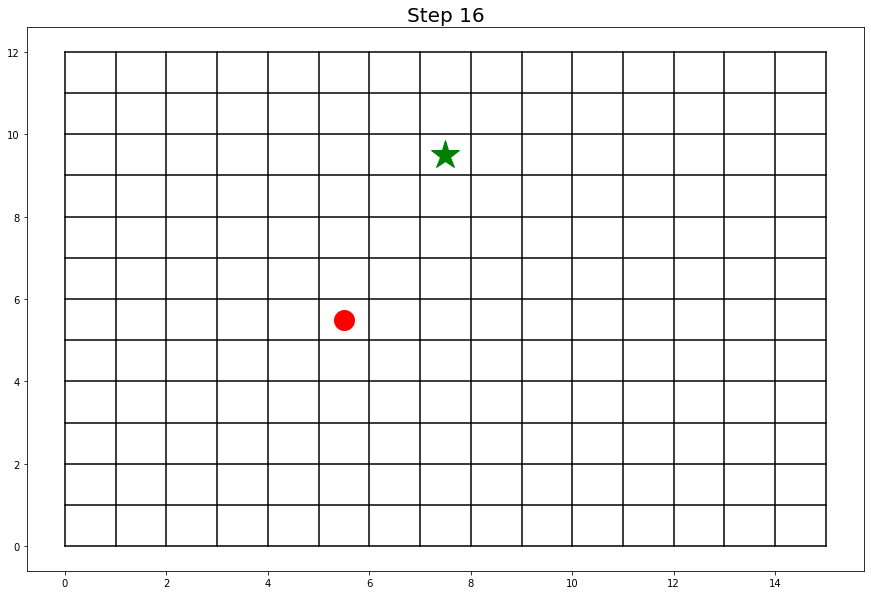

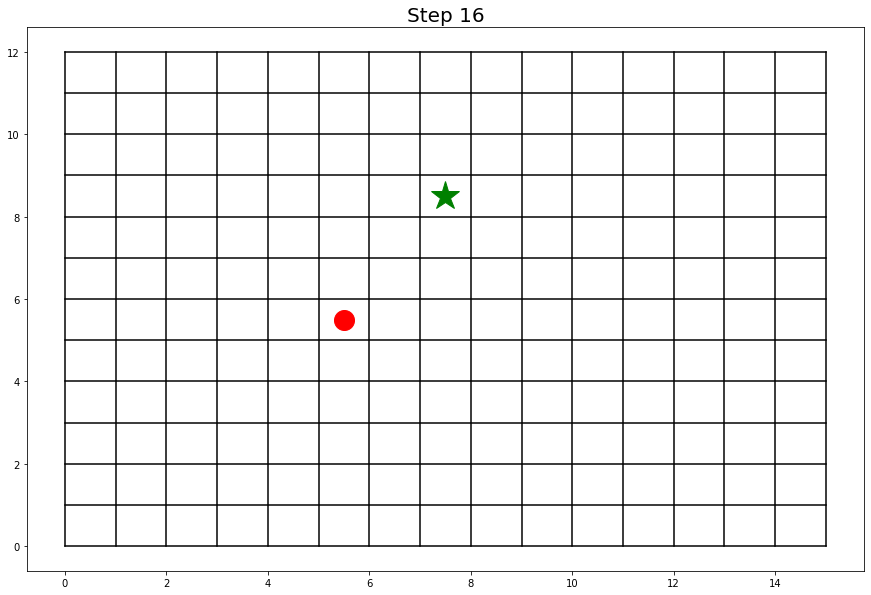

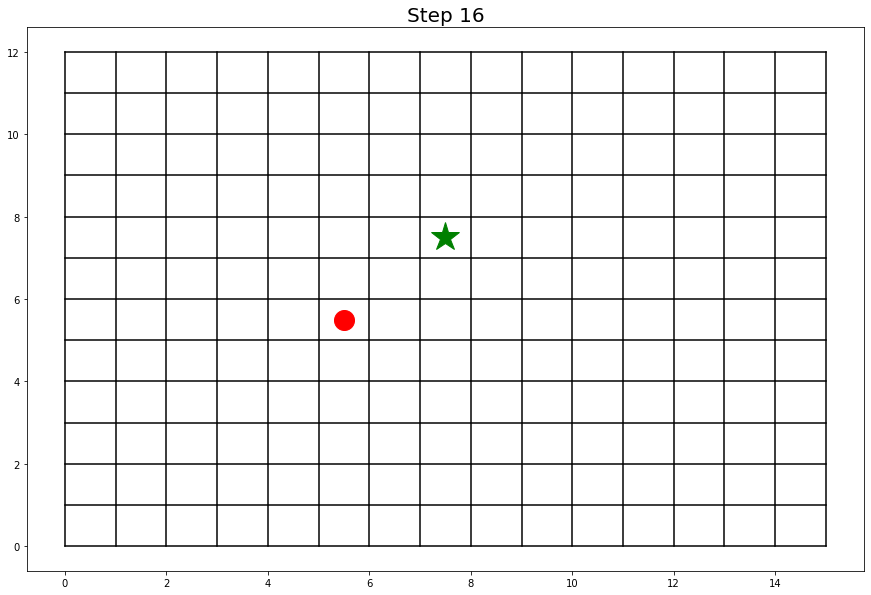

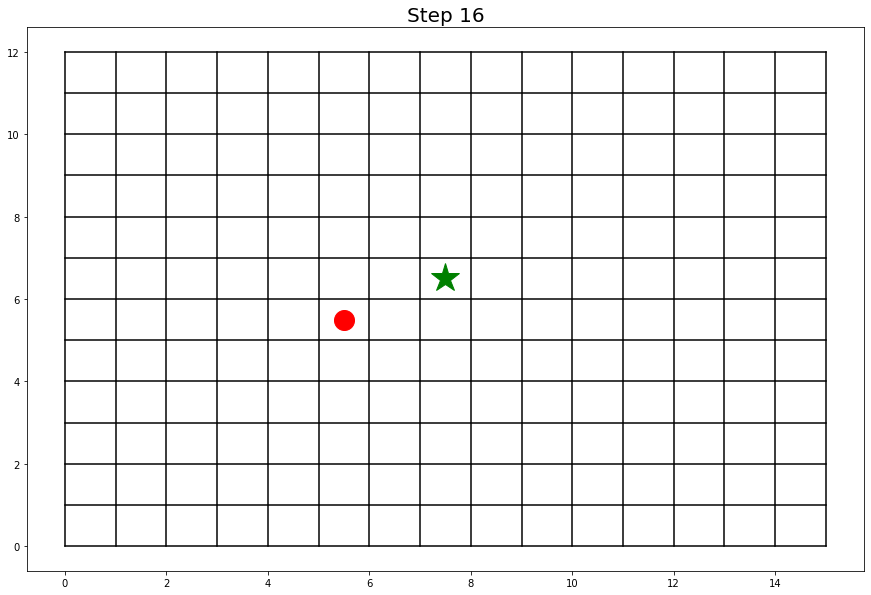

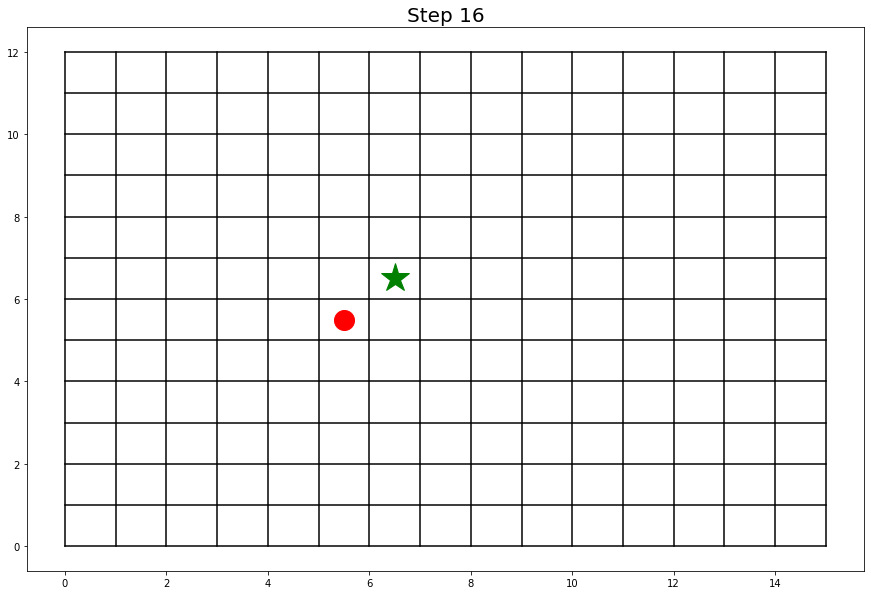

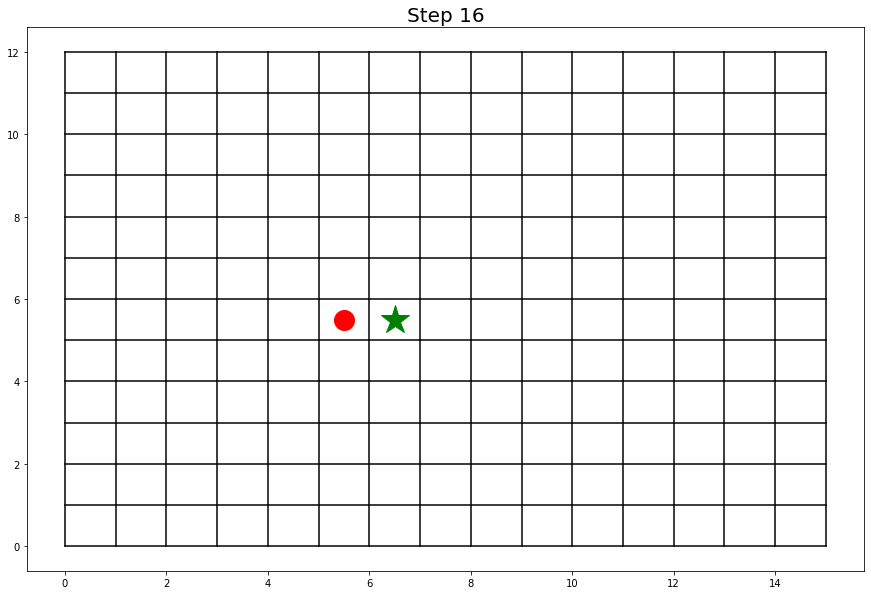

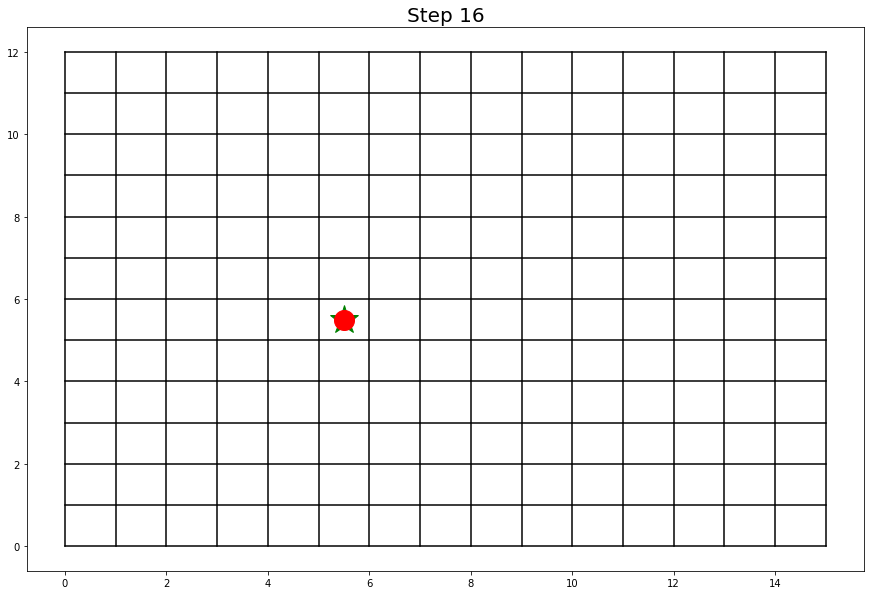

In [138]:
# plotting to see if we get the most optimized path
pos_snake = np.array([[7],[10]])
pos_food = np.array([[5],[5]])

list_actions = test_action_to_do(pos_snake, pos_food, [])


# plotting first canvas 
plt.figure(figsize = (15, 10))
# plotting the lines
for line in grid : plt.plot(line, color = 'black')
# plotting the columns
for k, col in enumerate(grid.T) : plt.plot(k * np.ones(nb_lines  + 1),
                                               col , color = 'black')

# plot snake position
plt.plot(pos_snake[0] + 0.5, pos_snake[1] + 0.5, marker = '*',
             markersize = 30, color = 'green')
    
# plot food
plt.plot(pos_food[0] + 0.5, pos_food[1] + 0.5, marker = 'o',
             markersize = 20, color = 'red')
plt.title("Step 0", fontsize = 20)
plt.show()

for k, action in enumerate(list_actions) : 
    pos_snake = from_way_to_pos(pos_snake, action[:, None])
    
    plt.figure(figsize = (15, 10))
    # plotting the lines
    for line in grid : plt.plot(line, color = 'black')
    # plotting the columns
    for k, col in enumerate(grid.T) : plt.plot(k * np.ones(nb_lines  + 1),
                                               col , color = 'black')

    # plot snake position
    plt.plot(pos_snake[0] + 0.5, pos_snake[1] + 0.5, marker = '*',
             markersize = 30, color = 'green')
    
    # plot food
    plt.plot(pos_food[0] + 0.5, pos_food[1] + 0.5, marker = 'o',
             markersize = 20, color = 'red')
    
    plt.title("Step " + str(k + 1), fontsize = 20)
    plt.show()
    

In [139]:
# everything is working, let's generate the dataset
x_train = []
y_train = []

for x in range(- nb_lines + 1, nb_lines) : 
    for y in range(- nb_cols + 1, nb_cols) : 
        # keeping the food position to zero. Since x and y go from negative
        # values to positive, this is equivalent to testing any position
        # of the snake and the food.
        x_train.append([x, y])
        y_train.append(action_to_do(x, y, 0, 0))

x_train = np.array(x_train)
y_train = np.array(y_train)

# creating a validation set. Since NN trains on all possible cases, we extract
# our validation set from the training set
# THUGLIFE
mask = np.random.randint(0, len(x_train), size = len(x_train))

x_valid = x_train[mask]
y_valid = y_train[mask]

In [161]:
# building a Keras model
from keras.models import Sequential
from keras.layers import Dense

#create model
model = Sequential()

#add model layers
model.add(Dense(5, activation = 'relu', input_shape=(2,)))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 16        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.fit(x_train, y_train, epochs = 25 )

Epoch 1/25
667/667 [==============================] - 0s 57us/step - loss: 0.0966
Epoch 2/25
667/667 [==============================] - 0s 36us/step - loss: 0.0945
Epoch 3/25
667/667 [==============================] - 0s 65us/step - loss: 0.0924
Epoch 4/25
667/667 [==============================] - 0s 46us/step - loss: 0.0902
Epoch 5/25
667/667 [==============================] - 0s 47us/step - loss: 0.0883
Epoch 6/25
667/667 [==============================] - 0s 46us/step - loss: 0.0861
Epoch 7/25
667/667 [==============================] - 0s 49us/step - loss: 0.0840
Epoch 8/25
667/667 [==============================] - 0s 63us/step - loss: 0.0821
Epoch 9/25
667/667 [==============================] - 0s 95us/step - loss: 0.0804
Epoch 10/25
667/667 [==============================] - 0s 83us/step - loss: 0.0789
Epoch 11/25
667/667 [==============================] - 0s 99us/step - loss: 0.0776
Epoch 12/25
667/667 [==============================] - 0s 102us/step - loss: 0.0761
Epoch 13/25


In [166]:
# look at results on validation set
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_valid)

# extract from the prediction the action to do
_y_pred = y_pred == np.max(y_pred, axis = 1)[:, None]

print("accuracy = ", accuracy_score(y_valid, _y_pred))

accuracy =  0.8695652173913043


In [167]:
import json
# save the weights to a json format
weights = model.get_weights()
weights_dic = {}

weights_dic['layer_1'] = {'a' : weights[0].T.tolist(),
                          'b' : weights[1][:, None].tolist(),}
weights_dic['layer_2'] = {'a' : weights[2].T.tolist(),
                          'b' : weights[3][:, None].tolist(),}
weights_dic['layer_3'] = {'a' : weights[4].T.tolist(),
                          'b' : weights[5][:, None].tolist(),}

with open("weights.json", 'w') as file : 
    json.dump(weights_dic, file)
    
print(weights_dic)

{'layer_1': {'a': [[-0.49640658497810364, 0.4253370761871338], [-0.27929627895355225, 0.9258110523223877], [-0.8698186278343201, 0.6742211580276489], [0.6960992217063904, 0.12687458097934723], [-0.3994043171405792, -1.16408371925354]], 'b': [[0.14892897009849548], [-0.07154309004545212], [0.176446333527565], [0.08971497416496277], [-0.16096298396587372]]}, 'layer_2': {'a': [[0.12853308022022247, -0.5459868311882019, 0.521704912185669, -0.5614646673202515, -0.0471632294356823], [-0.2435329258441925, 0.656083881855011, 0.36550599336624146, 0.5221785306930542, -0.30901607871055603], [0.9567451477050781, -0.6453057527542114, 0.8582505583763123, -0.48791244626045227, -0.1927589625120163]], 'b': [[-0.1522940695285797], [0.13156498968601227], [0.2795660197734833]]}, 'layer_3': {'a': [[-0.3404245674610138, -0.6130192279815674, -1.0835671424865723], [0.6736665368080139, -0.8124219179153442, 0.7141175866127014], [-0.5917528867721558, 0.2901421785354614, 0.1268109232187271], [0.13851134479045868,

In [106]:
%%js
//# testing our JS functions and compare to python
//# open js 
function relu(arrVals){
    //# arrVals : list of values coming from the product aX + b
    var output = []
    for(var i = 0; i < arrVals.length; i++){
        if(arrVals[i][0] <= 0){output.push([0])}
        else{output.push([arrVals[i]])}
    }
    return(output)
}

element.text(["relu", relu([1, 0, -5, 6])])

function arrProduct2D(arr0, arr1){
    //# computes the product of arr0 and arr1 (must be 2D arrays)
    var result = []
    var n = arr0.length    
    var m = arr0[0].length
    var p = arr1[0].length
    
    //# (n * m)  * (m * p)
    
    for (var k = 0; k < n; k++){        
        result.push([])
        for (var j = 0; j < p; j++){
            result[k][j] = 0
            for (var i = 0; i < m; i++){
                result[k][j] += arr0[k][i] * arr1[i][j]
            }
        }
    }
    return(result)
}

var arr0 = [[1, 4, 0], [-6, -1, 0], [-9, 2, 1]]
var arr1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

var res = arrProduct2D(arr0, arr1)

element.text(["result 2D product", res])

function sum2D(arr0, arr1){
    //# computes the sum of two 2D arrays
    var m = arr0.length
    var n = arr0[0].length
    
    var res = []
    
    for(var k = 0; k < m; k++){
        res.push([])
        for(var i = 0; i < n; i++){
            res[k][i] = arr0[k][i] + arr1[k][i]
        }
    }
    return(res)
}

var res = sum2D(arr0, arr1)

element.text(["result 2D sum", res])


function softMax2D(arr){
    //# calculation of softmax of a 2D array (column vector)
    var n = arr.length
    var output = []
    var denominator = 0
    
    //# calculation of denominator
    for (var k = 0; k < n; k++){
        denominator += Math.exp(arr[k][0])
    }
    
    for (var k = 0; k < n; k++){
        output[k] = [Math.exp(arr[k][0]) / denominator]
    }
    return(output)    
}

var res = softMax2D([[1], [2] ,[3]])
element.text(["output softmax", res])

function getOutputNeuralNet(nbLayers, dicWeights, inputX){
    // # apply relu for first n - 1 layers
    var X = inputX.slice()
    for (var layer = 1; layer <= nbLayers - 1; layer++){
        // # retrieve weights
        var a = dicWeights['layer_' + layer]["a"]
        var b = dicWeights['layer_' + layer]["b"]

        //# compute linear product and sum aX + b
        var z = arrProduct2D(a, X)
        z = sum2D(z, b)
        
        // # apply the reLu 
        var theta = relu(z)       
        
        // # copy the output
        X = theta.slice()
    }

    // # apply softmax
    var a = dicWeights['layer_' + nbLayers]["a"]
    var b = dicWeights['layer_' + nbLayers]["b"]
    
    //# compute linear product and sum aX + b
    var z = arrProduct2D(a, X)
    z = sum2D(z, b)

    var output = softMax2D(z)
    
    return(output)
}

function shape(arr2D){
    //# returns the shape of the array
    var m = arr2D.length
    var n = arr2D[0].length
    
    return([m, n])
}

var dicWeights = {"layer_1": {"a": [[0.3085288107395172, -0.29287269711494446], [0.28595444560050964, 0.2997848093509674], [0.15064889192581177, 0.30174732208251953], [1.0307252407073975, -1.0563029050827026], [0.7336825132369995, 0.11252527683973312]], "b": [[-0.38144224882125854], [0.5024477243423462], [0.6454489231109619], [0.8397594690322876], [-0.4756830036640167]]}, "layer_2": {"a": [[0.40348732471466064, 0.3235708773136139, 0.4215249717235565, -0.4523945450782776, -0.13665726780891418], [0.7906922698020935, -0.8020123243331909, -0.8093913793563843, -0.6103035807609558, -0.31832486391067505], [0.033907365053892136, 1.1957347393035889, 0.7595488429069519, -1.48991060256958, -0.8220753073692322]], "b": [[0.9404151439666748], [0.0], [0.4863642454147339]]}, "layer_3": {"a": [[-1.026139259338379, -0.14478254318237305, -1.271287202835083], [0.5697050094604492, 0.21866953372955322, -0.7570972442626953], [0.39613664150238037, 0.672470211982727, 0.053319014608860016], [0.18194136023521423, -0.194557785987854, -1.9155387878417969]], "b": [[0.9852604866027832], [-0.10178667306900024], [-1.1064428091049194], [0.013759655877947807]]}}
var inputX =  [[1], [1]]
var output = getOutputNeuralNet(3, dicWeights, inputX)
element.text(output)

<IPython.core.display.Javascript object>

In [130]:
model.predict(np.array([[-3, 2]]))

# it wooooorks!!!

array([[2.5390615e-04, 9.4934201e-01, 5.0404005e-02, 9.3621288e-10]],
      dtype=float32)

In [92]:
0: Array [ 0.004220804303330658 ]
​
1: Array [ 0.23365042966214797 ]
​
2: Array [ 0.7592315527473744 ]
​
3: Array [ 0.002897213287146937 ]

array([[ 1.12097183],
       [-0.8822711 ],
       [ 1.11948973],
       [-1.0771361 ],
       [ 1.08934166]])

In [132]:
liste = []
test_action_to_do(np.array([[7], [5]]), np.array([[10], [3]]), liste)

[array([0, 1, 0, 0])]

In [1]:
300000/6000

50.0